# Artificial Neural Network

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Overview the Data Set
* I will use "sign language digits data set" for this tutorial.
* Image size: 64x64
* Color space: Grayscale
* File format: npy
* Number of classes: 10 (Digits: 0-9)
* Number of participant students: 218
* Number of samples per student: 10

(-0.5, 63.5, 63.5, -0.5)

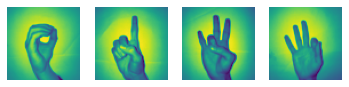

In [2]:
#Load Data Set
x_l = np.load('X.npy')
Y_l = np.load('Y.npy')
img_size = 64
plt.subplot(1, 4, 1)
plt.imshow(x_l[264].reshape(img_size,img_size))
plt.axis('off')
plt.subplot(1, 4, 2)
plt.imshow(x_l[900].reshape(img_size,img_size))
plt.axis("off")
plt.subplot(1, 4, 3)
plt.imshow(x_l[512].reshape(img_size,img_size))
plt.axis('off')
plt.subplot(1, 4, 4)
plt.imshow(x_l[25].reshape(img_size,img_size))
plt.axis('off')

In [3]:
# concatenate directories
X = np.concatenate((x_l[204:409], x_l[822:1027] ), axis=0)
# from 0 to 204 is zero sign and from 205 to 410 is one sign 
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z, o), axis=0).reshape(X.shape[0],1)
print("X shape: " , X.shape)
print("Y shape: " , Y.shape)

X shape:  (410, 64, 64)
Y shape:  (410, 1)


* The shape of the X is (410, 64, 64)
    * 410 means that we have 410 images (zero and one signs)
    * 64 means that our image size is 64x64 (64x64 pixels)
* The shape of the Y is (410,1)
    *  410 means that we have 410 labels (0 and 1) 

* Split X and Y into train and test sets.
     * test_size = percentage of test size. test = 15% and train = 75%
* random_state = use same seed while randomizing. 

In [4]:
# Then lets create x_train, y_train, x_test, y_test arrays
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

* Our label array (Y) is already flatten(2D) so we leave it like that.
* Lets flatten X array(images array).

In [5]:
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2])
print("X train flatten",X_train_flatten.shape)
print("X test flatten",X_test_flatten.shape)

X train flatten (348, 4096)
X test flatten (62, 4096)


* 348 images and each image has 4096 pixels in image train array.
* 62 images and each image has 4096 pixels in image test array.

<a href="http://ibb.co/bWMK7c"><img src="http://image.ibb.co/fOqCSc/3.png" alt="3" border="0"></a>

In [6]:
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (4096, 348)
x test:  (4096, 62)
y train:  (1, 348)
y test:  (1, 62)


In [7]:
# calculation of z
#z = np.dot(w.T,x_train)+b
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head
#y_head = sigmoid(z)

## Computation Graph
* It is basically taking logistic regression and repeating it at least 2 times.
* In logistic regression, there are input and output layers. However, in neural network, there is at least one hidden layer between input and output layer.

<a href="artificial_neural_network"><img src="http://preview.ibb.co/dajVyH/9.jpg" alt="9" border="0"></a>
* As you can see there is one hidden layer between input and output layers. And this hidden layer has 3 nodes.
* Input and output layers do not change. They are same like logistic regression.
* It is a activation function like sigmoid function. Tanh activation function is better than sigmoid for hidden units bacause mean of its output is closer to zero so it centers the data better for the next layer. Also tanh activation function increase non linearity that cause our model learning better.


## Size of layers and initializing parameters weights and bias 

<a href="artificial_neural_network"><img src="https://i.ibb.co/PZ0QW1H/Ekran-g-r-nt-s-2020-09-10-21-57-11.png" alt="9" border="0"></a>
* At logistic regression, we initialize weights 0.01 and bias 0. At this time, we initialize weights randomly. Because if we initialize parameters zero each neuron in the first hidden layer will perform the same comptation. Therefore, even after multiple iterartion of gradiet descent each neuron in the layer will be computing same things as other neurons. Therefore we initialize randomly. Also initial weights will be small. If they are very large initially, this will cause the inputs of the tanh to be very large, thus causing gradients to be close to zero. The optimization algorithm will be slow.
* Bias can be zero initially.

In [8]:
# intialize parameters and layer sizes
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    parameters = {"weight1": np.random.randn(3,x_train.shape[0]) * 0.1,
                  "bias1": np.zeros((3,1)),
                  "weight2": np.random.randn(y_train.shape[0],3) * 0.1,
                  "bias2": np.zeros((y_train.shape[0],1))}
    return parameters

* Forward propagation is almost same with logistic regression.
* The only difference is we use tanh function and we make all process twice.
* Also numpy has tanh function. So we do not need to implement it.

In [9]:
def forward_propagation_NN(x_train, parameters):

    Z1 = np.dot(parameters["weight1"],x_train) +parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"],A1) + parameters["bias2"]
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

## Loss function and Cost function
* Loss and cost functions are same with logistic regression
<a href="artificial_neural_network"><img src="https://image.ibb.co/nyR9LU/as.jpg" alt="9" border="0"></a>
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small$$

In [10]:
# Compute cost
def compute_cost_NN(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2),Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    return cost

## Backward propagation
* As you know backward propagation means derivative.

In [11]:
# Backward Propagation
def backward_propagation_NN(parameters, cache, X, Y):

    dZ2 = cache["A2"]-Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads

## Update Parameters 
* Updating parameters also same with logistic regression.

In [12]:
# update parameters
def update_parameters_NN(parameters, grads, learning_rate = 0.01):
    parameters = {"weight1": parameters["weight1"]-learning_rate*grads["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate*grads["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate*grads["dweight2"],
                  "bias2": parameters["bias2"]-learning_rate*grads["dbias2"]}
    
    return parameters

## Prediction with learnt parameters weight and bias


In [13]:
# prediction
def predict_NN(parameters,x_test):
    # x_test is a input for forward propagation
    A2, cache = forward_propagation_NN(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

## Create Model

Cost after iteration 0: 0.324704
Cost after iteration 100: 0.336480
Cost after iteration 200: 0.341128
Cost after iteration 300: 0.342851
Cost after iteration 400: 0.343423
Cost after iteration 500: 0.343549
Cost after iteration 600: 0.343502
Cost after iteration 700: 0.343378
Cost after iteration 800: 0.343199
Cost after iteration 900: 0.342950
Cost after iteration 1000: 0.342587
Cost after iteration 1100: 0.342016
Cost after iteration 1200: 0.341885
Cost after iteration 1300: 0.337993
Cost after iteration 1400: 0.310795
Cost after iteration 1500: 0.267667
Cost after iteration 1600: 0.226802
Cost after iteration 1700: 0.193222
Cost after iteration 1800: 0.165977
Cost after iteration 1900: 0.146406
Cost after iteration 2000: 0.128199
Cost after iteration 2100: 0.114869
Cost after iteration 2200: 0.117131
Cost after iteration 2300: 0.091778
Cost after iteration 2400: 0.083410


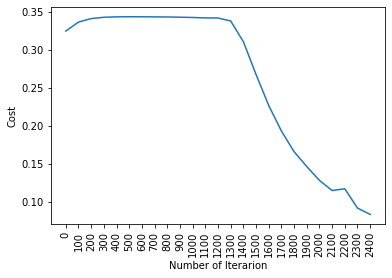

train accuracy: 98.85057471264368 %
test accuracy: 95.16129032258064 %


In [14]:
# 2 - Layer neural network
def two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations):
    cost_list = []
    index_list = []
    #initialize parameters and layer sizes
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)

    for i in range(0, num_iterations):
         # forward propagation
        A2, cache = forward_propagation_NN(x_train,parameters)
        # compute cost
        cost = compute_cost_NN(A2, y_train, parameters)
         # backward propagation
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
         # update parameters
        parameters = update_parameters_NN(parameters, grads)
        
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    
    # predict
    y_prediction_test = predict_NN(parameters,x_test)
    y_prediction_train = predict_NN(parameters,x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters
parameters = two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations=2500)

## L-Layer Neural Network
* Earlier layerls can detect simple features.
* When model composing simple features together in later layers of neural network that it can learn more and more complex functions. For example, lets look at our sign one.
<a href="http://ibb.co/dNgDJH"><img src="http://preview.ibb.co/mpD4Qx/10.jpg" alt="10" border="0"></a>
* When number of layer increase, layers start to learn more complex things like convex shapes or characteristic features like forefinger.
* This tutorial our model will have 2 hidden layer with 8 and4 nodes, respectively. 
* As a activation function we will use relu(first hidden layer), relu(second hidden layer) and sigmoid(output layer) respectively.
* Number of iteration will be 100.

In [15]:
# reshaping
x_train, x_test, y_train, y_test = x_train.T, x_test.T, y_train.T, y_test.T

## Neural Network with Keras
* units: output dimensions of node
* kernel_initializer: to initialize weights
* activation: activation function, we use relu
* input_dim: input dimension that is number of pixels in our images (4096 px)
* optimizer: we use adam optimizer
    * Adam is one of the most effective optimization algorithms for training neural networks.
    * Some advantages of Adam is that relatively low memory requirements and usually works well even with little tuning of hyperparameters
* loss: Cost function is same. By the way the name of the cost function is cross-entropy cost function that we use previous parts.
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \$$
* metrics: it is accuracy.
* cross_val_score: use cross validation.
* epochs: number of iteration

In [16]:
# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Epoch 1/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5086
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5431
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6921 - accuracy: 0.5431
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.5431
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.5431
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6863 - accuracy: 0.5431
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6812 - accuracy: 0.5431
Epoch 8/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6764 - accuracy: 0.5431
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6711 - accuracy: 0.6681
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6603 - accuracy: 0.6207
Epoch 11/100
8/8 [===========

8/8 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5216
Epoch 67/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5216
Epoch 68/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5216
Epoch 69/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5216
Epoch 70/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5216
Epoch 71/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5216
Epoch 72/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.5216
Epoch 73/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5216
Epoch 74/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5216
Epoch 75/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5216
Epoch 76/100
8/8 [===============